In [1]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining\data\2.5\forecast what the code is and analysing.

Example on how to make an API call using your API key
API call

http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}

In [2]:
# Dependencies
import collections
# collections_abc = getattr(collections, 'Iterable', collections)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from config import API
import json

# # Configure gmaps
# gmaps.configure(api_key=gkey)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [4]:
from citipy import citipy

#randome numbers between -90 to 90 for latitude and -180 to 180 for longitude
city = citipy.nearest_city(-19, 169.21)       
city.city_name, city.country_code     # Tainan, my home town   


('isangel', 'vu')

In [106]:

# Range of latitudes and longitudes
# while c < 644:
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs = np.hstack((lats,lngs))
# print(list(lat_lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# c= len(cities)



In [ ]:
# Perform a weather check on each of the cities using a series of successive API calls.
#cities = ['yinchuan','airai','kushima']
# temp = []

# api_url = f"https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={API}"
# for city in cities:
  
#   wea_data = requests.get(api_url).json() 
# #Get Temperature
# #   temp = wea_data["main"]["temp"]
#   temp.append(wea_data['main']['temp'])

# print(f"The temperature information for {cities} received is: {temp}")

In [114]:
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
count = 0
set = 1
units ="imperial"
api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    try:
        api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
        response = requests.get(api_url + city).json()
        city_name.append(city)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        if count > 48:
            count = 1
            set += 1
        else:
            count += 1
        print("Processing Record %s of Set %s | %s" %(count, set, city))
    except:
        print("City not found: Skipping...")
        city_name.pop()
        pass
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ewa beach
Processing Record 2 of Set 1 | swan hill
Processing Record 3 of Set 1 | port-gentil
Processing Record 4 of Set 1 | atambua
Processing Record 5 of Set 1 | ugoofaaru
Processing Record 6 of Set 1 | mitsamiouli
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | ancud
City not found: Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | norman wells
City not found: Skipping...
City not found: Skipping...
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | maridi
Processing Record 19 of Set 1 | koulikoro
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | katsuura
Processing R

In [ ]:
# cities = ["Paris", "Sydney", "Oslo", "New York", "Tokyo"]
# units ="imperial"
# # set up lists to hold reponse info
# lat = []
# max_temp =[]
# windspeed =[]
# humid =[]
# cloud = []
# date = []
# country =[]

# # Loop through the list of cities and perform a request for data on each

# api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
# for city in cities:
#     try:
        
#         #print(api_url)
#         response = requests.get(api_url + city).json()
        
#         lat.append(response['coord']['lat'])
#         max_temp.append(response['main']['temp_max'])
#         humid.append(response['main']['humidity'])
#         cloud.append(response['clouds']['all'])
#         windspeed.append(response['wind']['speed'])
#         country.append(response['sys']['country'])
#         date.append(response['dt'])

#     except KeyError:
#         lat.append(-999999)
#         max_temp.append(-111111)

# print(f"The latitude information information for {cities} received is: {lat}")
# print(f"The temperature information is: {max_temp}")
# print(f"The humidity is: {humid}")
# print(f"The country  received is: {country}")



In [124]:
# len(lat, temp, windspeed, humid, cloud, date, country) 
# temp
# windspeed
# humid
# cloud 
# date 
# country
len(city_name), len(lat), len(max_temp), len(wind_speed), len(humidity), len(cloudiness), len(country), len(date)


(538, 538, 538, 538, 538, 538, 538, 538)

In [ ]:
new_df = 

In [12]:
# # Note: target url works!
# target_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={API}"
# # Run a request to endpoint and convert result to json
# wea_data = requests.get(target_url).json()

# # Print the json
# wea_data

{'cod': '400', 'message': 'wrong latitude'}

In [125]:
# create a data frame max_temp = []
# humidity 
# cloudiness
# wind_speed
# date
# country 
weather_dict = {"City": city_name,"Latitude": lat, "Temp":max_temp, "Cloudiness": cloudiness,"Humidity":humidity, "Wind Speed": wind_speed, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Temp,Cloudiness,Humidity,Wind Speed,Date
0,ewa beach,21.3156,301.12,0,60,5.14,1655271293
1,swan hill,-35.3378,287.31,94,72,4.65,1655271201
2,port-gentil,-0.7193,298.13,40,83,4.12,1655271294
3,atambua,-9.1061,300.52,36,66,1.20,1655271294
4,ugoofaaru,5.6667,301.72,57,74,5.44,1655271294
...,...,...,...,...,...,...,...
533,mancio lima,-7.6142,290.87,39,70,0.24,1655271571
534,putina,-15.4667,277.56,33,44,0.78,1655271571
535,andros,37.8333,298.46,1,64,5.36,1655271572
536,parrita,9.5201,296.21,100,95,0.50,1655271572


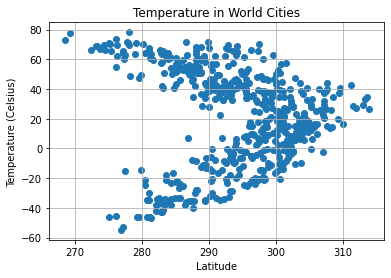

In [126]:
# Build a scatter plot for each data type
# plt.xlim( [ -90, 90 ] ) 
# plt.ylim( [-50 , 130 ] ) 
plt.scatter(weather_data["Temp"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

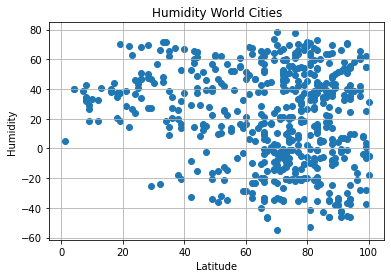

In [146]:
plt.scatter(weather_data["Humidity"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

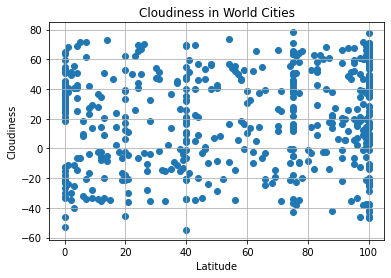

In [147]:
plt.scatter(weather_data["Cloudiness"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

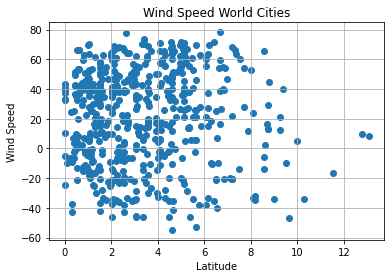

In [148]:
plt.scatter(weather_data["Wind Speed"], weather_data["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind SpeedInWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Lets try requestion by name

# target2_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{state},{country}&limit={limit}&appid={API}"

# wea2_data = requests.get(target2_url).json()

# # Print the json
# wea2_data


In [127]:
wea_data.keys()

dict_keys(['cod', 'message'])

In [ ]:
len(wea_data["list"])

In [133]:
North = weather_data[weather_data["Latitude"] >= 0 ]
print(North)

             City  Latitude    Temp  Cloudiness  Humidity  Wind Speed  \
0       ewa beach   21.3156  301.12           0        60        5.14   
4       ugoofaaru    5.6667  301.72          57        74        5.44   
8       fairbanks   64.8378  294.15           0        44        4.63   
15   norman wells   65.2820  283.17          75        71        4.12   
16           hilo   19.7297  299.00          40        78        2.57   
..            ...       ...     ...         ...       ...         ...   
528       clinton   42.5870  295.33           0        65        0.45   
530  bognor regis   50.7821  288.56           4        93        3.05   
532       kamenka   51.3223  295.50          31        60        4.67   
535        andros   37.8333  298.46           1        64        5.36   
536       parrita    9.5201  296.21         100        95        0.50   

           Date  
0    1655271293  
4    1655271294  
8    1655271296  
15   1655271300  
16   1655271302  
..          ...

In [130]:
# Extract latitude and temp
lat = wea_data["city"]['coord']['lat']
temp = wea_data["list"][0]["main"]['temp']
temp, lat

KeyError: 'city'

The r-squared is: 0.4837439462600159


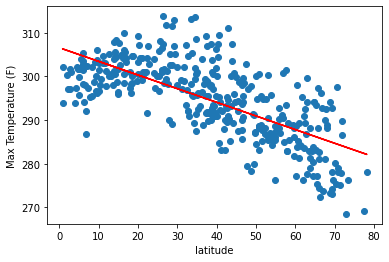

In [135]:
# Your second requirement is to run linear regression on each relationship, only this time separating them 
# into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude): 

# Northern Hemisphere (greater than or equal to 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] > 0 or use a dataframe then graph it!


x_values = North['Latitude']
y_values = North['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 500 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.5469060171049187


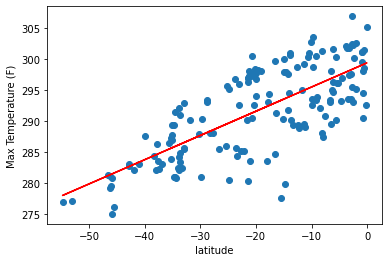

In [139]:
# Southern Hemisphere (less than 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] < 0 or use a dataframe then graph it!
south =  weather_data[weather_data["Latitude"] < 0 ]

x_values = south['Latitude']
y_values = south['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ -90, 0 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 1.2602506246997982e-05


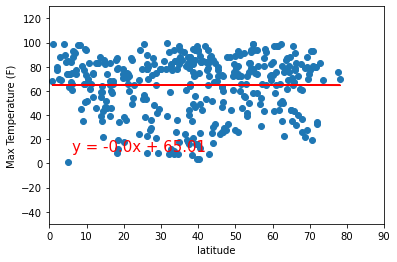

In [140]:
#Latitude vs. Humidity -----North
x_values = North['Latitude']
y_values = North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlim( [ 0, 90 ] ) 
plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()




The r-squared is: 0.002606334937960752


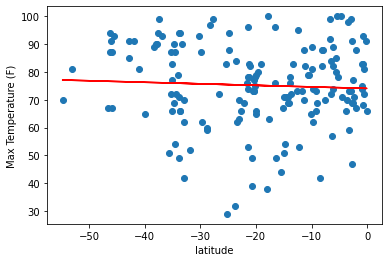

In [142]:
#Latitude vs. Humidity -----South
x_values = south['Latitude']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.xlim( [ 0, 90 ] ) 
# plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()